In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [15]:
audio_path = 'audio.wav'
y, sr = librosa.load(audio_path)

In [32]:
print(y, y.shape, type(y))
print(sr)
print(len(y))
#오디오 총 길이 
print(len(y)/sr)

[0. 0. 0. ... 0. 0. 0.] (7920140,) <class 'numpy.ndarray'>
22050
7920140
359.19002267573694


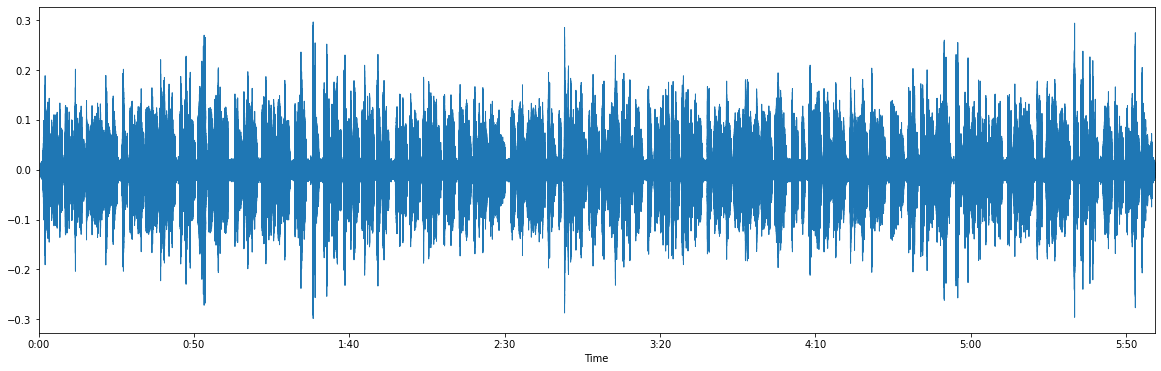

In [30]:
plt.figure(figsize=(20,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

## Short Time Fourier Transform

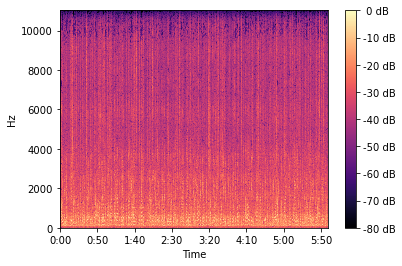

In [18]:
stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=1024)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='linear', x_axis='time', )#cmap = cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()


In [25]:
print(S_dB.shape, type(S_dB))
print(D.shape, type(D))
print(stft_result.shape, type(stft_result))

(2049, 7735) <class 'numpy.ndarray'>
(2049, 7735) <class 'numpy.ndarray'>
(2049, 7735) <class 'numpy.ndarray'>


## Fourier Transform
- 시간 영역 데이터를 주파수 영역으로 변경
- y축 :주파수 (로그스케일)
- color축: 데시벨 (진폭)

(1025, 15470)


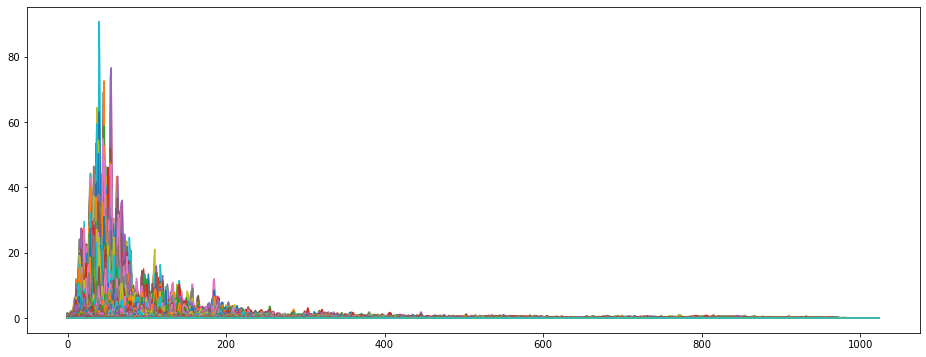

In [43]:
D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) #np.abs 로 절댓값으로 바꿔준다. 
print(D.shape)


#np.flip(D, axis)??
plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

## Spectogram
- 시간에 따른 신호 주파수의 스펙트럼 그래프
- Sonograhps, Voiceprints, Voiecgrams 라고 불림

/usr/local/Caskroom/miniforge/base/envs/Goofanaka/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/Caskroom/miniforge/base/envs/Goofanaka/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/Caskroom/miniforge/base/envs/Goofanaka/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


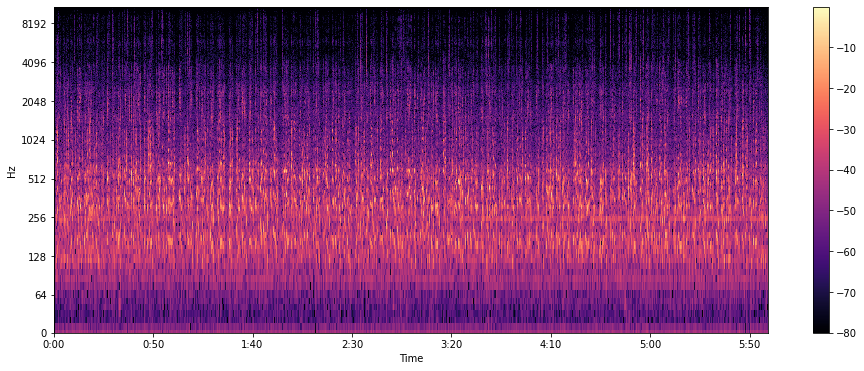

In [46]:
dB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(dB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [49]:
dB.shape

(1025, 15470)

## Mel Spectogram
- 인간이 이해하기힘든 Spectogram의 y축을 Mel Scale로 변환한것

/usr/local/Caskroom/miniforge/base/envs/Goofanaka/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/Caskroom/miniforge/base/envs/Goofanaka/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/Caskroom/miniforge/base/envs/Goofanaka/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


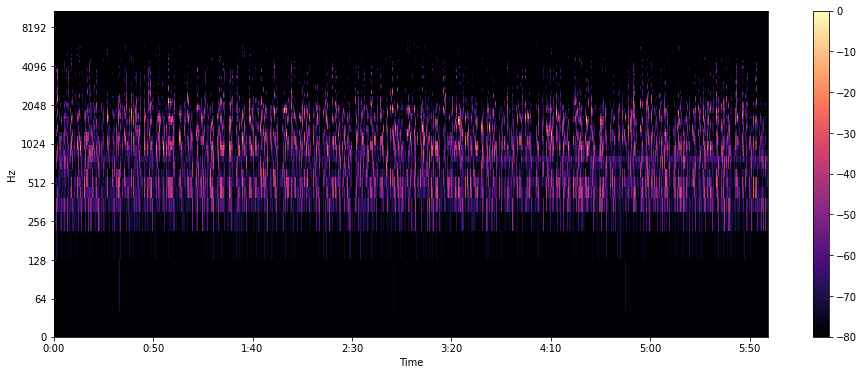

In [52]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_dB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_dB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

## Harmonic and Percussive Components

- Harmonics: 사람의 귀로 구분할 수 없는 특징들 (음악의 색깔)
- Percussives: 리듬과 감정을 나타내는 충격파

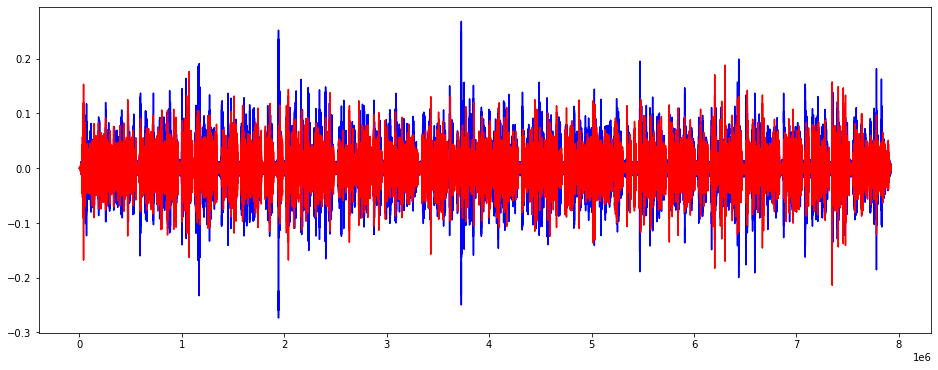

In [54]:
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(16, 6))
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

## Spectral Centroid

- 소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표
- 예를 들어, 블루스 음악은 무게 중심이 가운데 부분에 놓여있는 반면, 메탈 음악은 (끝 부분에서 달리기 때문에) 노래의 마지막 부분에 무게 중심이 실린다

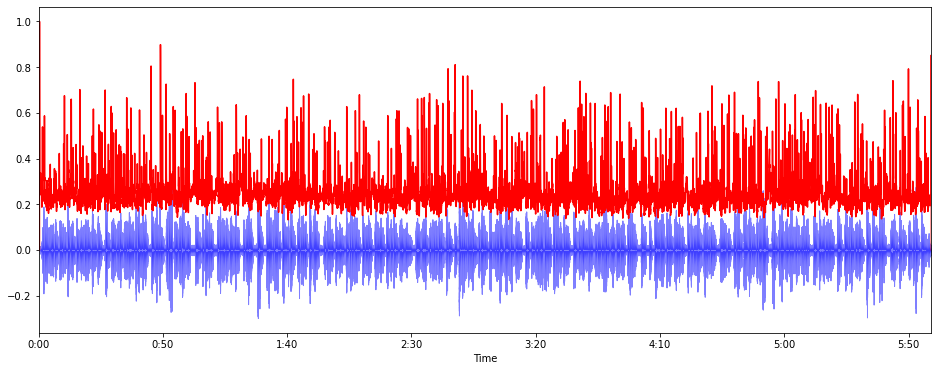

In [55]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

# Spectral Rolloff

- 신호 모양을 측정한다
- 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

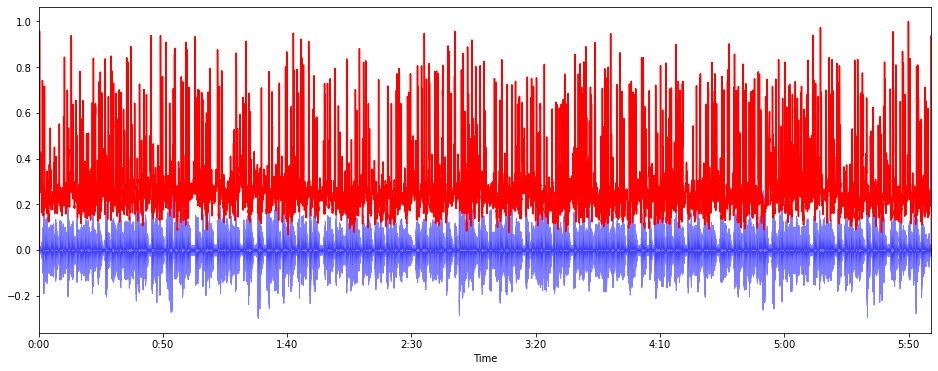

In [56]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

## Mel-Frequency Cepstral Coefficients (MFCCs)

- MFCCs는 특징들의 작은 집합(약 10-20)으로 스펙트럴 포곡선의 전체적인 모양을 축약하여 보여준다
- 사람의 청각 구조를 반영하여 음성 정보 추출

mean: 0.54
var: 0.02


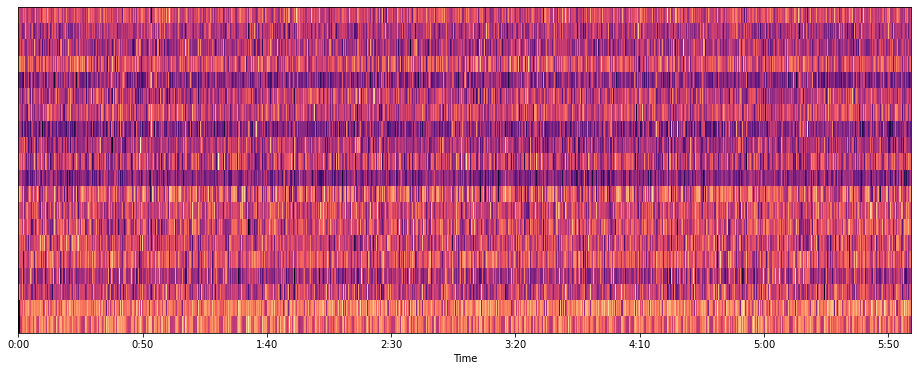

In [58]:
mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = normalize(mfccs, axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

## Chroma Frequencies

- 크로마 특징은 음악의 흥미롭고 강렬한 표현이다
- 크로마는 인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다
- 모든 스펙트럼을 12개의 Bin으로 표현한다
- 12개의 Bin은 옥타브에서 12개의 각기 다른 반음(Semitones=Chroma)을 의미한다

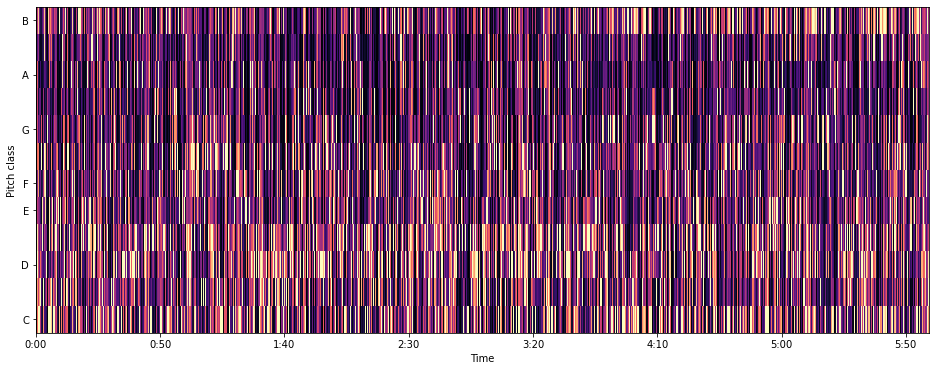

In [59]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.show()